In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### 데이터 불러오기

In [2]:
data1 = pd.read_excel('data/스테이션/스테이션 월계점 판매 데이터_24.01~04/스테이션 월계점 판매 데이터_24.01.xlsx')
data2 = pd.read_excel('data/스테이션/스테이션 월계점 판매 데이터_24.01~04/스테이션 월계점 판매 데이터_24.02.xlsx')
data3 = pd.read_excel('data/스테이션/스테이션 월계점 판매 데이터_24.01~04/스테이션 월계점 판매 데이터_24.03.xlsx')
data4 = pd.read_excel('data/스테이션/스테이션 월계점 판매 데이터_24.01~04/스테이션 월계점 판매 데이터_24.04.xlsx')

### 데이터 통합

In [3]:
d1 = pd.concat([data1, data2], axis=0)
d2 = pd.concat([d1, data3], axis=0)
df = pd.concat([d2, data4], axis=0)

In [4]:
df

,그룹: 판매일자,그룹: 브랜드명,#,매장,매장명,판매일자,전표번호,브랜드명,카테고리,실판매금액,수량합계,본사바코드,참고사항
0,▷ 2024-01-01,NaN,NaN,전체 88건,NaN,NaN,NaN,NaN,NaN,1801800,102,NaN,NaN
1,NaN,▷ 마니,NaN,전체 22건,NaN,NaN,NaN,NaN,NaN,614600,21,NaN,NaN
2,NaN,NaN,1.0,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000,1,B235KA99400000F,NaN
3,NaN,NaN,2.0,M012,이마트_월계점,2024-01-01,11020.0,마니,여성의류,-19900,-1,B235KA99400000F,NaN
4,NaN,NaN,3.0,M012,이마트_월계점,2024-01-01,11033.0,마니,여성의류,27000,1,B235KA99400000F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,NaN,NaN,722.0,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000,1,B235KA06600000F,NaN
910,NaN,NaN,723.0,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F,NaN
911,NaN,NaN,724.0,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000,2,B235KA06600000F,NaN
912,NaN,NaN,725.0,M012,이마트_월계점,2024-04-25,11006.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F,NaN


### 브랜드별 판매금액 확인

In [5]:
brand_sales_sum = df.groupby('브랜드명')['실판매금액'].sum()
brand_sales_sum = pd.DataFrame(brand_sales_sum)
brand_sales_sum.reset_index(inplace=True)
brand_sales_sum

,브랜드명,실판매금액
0,개달당,1071000
1,니즈더펫,218400
2,다비 디퓨저,80400
3,도그바겐,199000
4,라그라스,1406800
5,릴리엔,1470000
6,마니,44100100
7,모라니크,6011800
8,보라상점,1065000
9,뿌잉샵,-57000


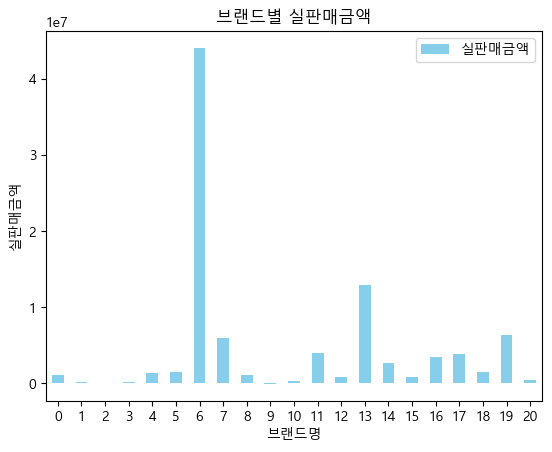

In [6]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 막대그래프로 시각화
brand_sales_sum.plot(kind='bar', color='skyblue')
plt.xlabel('브랜드명')  # x축 라벨
plt.ylabel('실판매금액')  # y축 라벨
plt.title('브랜드별 실판매금액')  # 그래프 제목
plt.xticks(rotation=0)  # x축 라벨의 회전 각도
plt.show()

### 불필요한 컬럼 제거

In [7]:
df = df.drop(df.columns[:3], axis=1)
df

,매장,매장명,판매일자,전표번호,브랜드명,카테고리,실판매금액,수량합계,본사바코드,참고사항
0,전체 88건,NaN,NaN,NaN,NaN,NaN,1801800,102,NaN,NaN
1,전체 22건,NaN,NaN,NaN,NaN,NaN,614600,21,NaN,NaN
2,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000,1,B235KA99400000F,NaN
3,M012,이마트_월계점,2024-01-01,11020.0,마니,여성의류,-19900,-1,B235KA99400000F,NaN
4,M012,이마트_월계점,2024-01-01,11033.0,마니,여성의류,27000,1,B235KA99400000F,NaN
...,...,...,...,...,...,...,...,...,...,...
909,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000,1,B235KA06600000F,NaN
910,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F,NaN
911,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000,2,B235KA06600000F,NaN
912,M012,이마트_월계점,2024-04-25,11006.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F,NaN


In [8]:
df = df.drop('참고사항', axis=1)
df

,매장,매장명,판매일자,전표번호,브랜드명,카테고리,실판매금액,수량합계,본사바코드
0,전체 88건,NaN,NaN,NaN,NaN,NaN,1801800,102,NaN
1,전체 22건,NaN,NaN,NaN,NaN,NaN,614600,21,NaN
2,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000,1,B235KA99400000F
3,M012,이마트_월계점,2024-01-01,11020.0,마니,여성의류,-19900,-1,B235KA99400000F
4,M012,이마트_월계점,2024-01-01,11033.0,마니,여성의류,27000,1,B235KA99400000F
...,...,...,...,...,...,...,...,...,...
909,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000,1,B235KA06600000F
910,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F
911,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000,2,B235KA06600000F
912,M012,이마트_월계점,2024-04-25,11006.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F


### 불필요한 행 제거

In [9]:
df.drop(df[df['매장'] != 'M012'].index, inplace=True)
df

,매장,매장명,판매일자,전표번호,브랜드명,카테고리,실판매금액,수량합계,본사바코드
2,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000,1,B235KA99400000F
5,M012,이마트_월계점,2024-01-01,11058.0,마니,여성의류,-19900,-1,B235KA99400000F
6,M012,이마트_월계점,2024-01-01,11034.0,마니,여성의류,27000,1,B235KA99400000F
8,M012,이마트_월계점,2024-01-01,11072.0,마니,여성의류,29900,1,B235KA99400000F
12,M012,이마트_월계점,2024-01-01,11009.0,마니,여성의류,46900,2,B235KA99400000F
...,...,...,...,...,...,...,...,...,...
906,M012,이마트_월계점,2024-04-25,11021.0,윈드스카프,양말,10000,1,B235KA78500000F
909,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000,1,B235KA06600000F
910,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000,1,B235KA06600000F
911,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000,2,B235KA06600000F


### 데이터 처리

1. 기존에 있는 '실판매금액'이라는 컬럼명을 '판매금액'으로 변경
2. 기존에 있는 '수량합계'라는 컬럼명을 '판매수량'으로 변경
3. 8번째 열(인덱스: 7)에 '환불금액'이라는 새 컬럼 생성 (데이터 값은 nan으로)
4. 10번째 열(인덱스: 9)에 '환불수량'이라는 새 컬럼 생성 (데이터 값은 nan으로)
5. '판매금액'이라는 컬럼에서 음수(0 미만)인 데이터는 '환불금액'이라는 컬럼에 해당 '판매금액' 값의 절댓값으로 채운 뒤, '판매금액' 값은 nan으로 변경
6. '판매수량'이라는 컬럼에서 음수(0 미만)인 데이터는 '환불수량'이라는 컬럼에 해당 '판매수량' 값의 절댓값으로 채운 뒤, '판매수량' 값은 nan으로 변경

In [10]:
# 컬럼명 변경
df.rename(columns={'실판매금액': '판매금액'}, inplace=True)
df.rename(columns={'수량합계': '판매수량'}, inplace=True)

# 새 컬럼 생성
df.insert(7, '환불금액', np.nan)
df.insert(9, '환불수량', np.nan)

# 환불 데이터 처리 - 새로운 열에 삽입 후 기존 판매 데이터 삭제
df.loc[df['판매금액'] < 0, '환불금액'] = df.loc[df['판매금액'] < 0, '판매금액'].abs()
df.loc[df['판매금액'] < 0, '판매금액'] = np.nan

df.loc[df['판매수량'] < 0, '환불수량'] = df.loc[df['판매수량'] < 0, '판매수량'].abs()
df.loc[df['판매수량'] < 0, '판매수량'] = np.nan

df

,매장,매장명,판매일자,전표번호,브랜드명,카테고리,판매금액,환불금액,판매수량,환불수량,본사바코드
2,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000.0,NaN,1.0,NaN,B235KA99400000F
5,M012,이마트_월계점,2024-01-01,11058.0,마니,여성의류,NaN,19900.0,NaN,1.0,B235KA99400000F
6,M012,이마트_월계점,2024-01-01,11034.0,마니,여성의류,27000.0,NaN,1.0,NaN,B235KA99400000F
8,M012,이마트_월계점,2024-01-01,11072.0,마니,여성의류,29900.0,NaN,1.0,NaN,B235KA99400000F
12,M012,이마트_월계점,2024-01-01,11009.0,마니,여성의류,46900.0,NaN,2.0,NaN,B235KA99400000F
...,...,...,...,...,...,...,...,...,...,...,...
906,M012,이마트_월계점,2024-04-25,11021.0,윈드스카프,양말,10000.0,NaN,1.0,NaN,B235KA78500000F
909,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000.0,NaN,1.0,NaN,B235KA06600000F
910,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000.0,NaN,1.0,NaN,B235KA06600000F
911,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000.0,NaN,2.0,NaN,B235KA06600000F


### 데이터 타입 변경

In [11]:
df.dtypes

매장        object
매장명       object
판매일자      object
전표번호     float64
브랜드명      object
카테고리      object
판매금액     float64
환불금액     float64
판매수량     float64
환불수량     float64
본사바코드     object
dtype: object

In [12]:
df['전표번호'] = df['전표번호'].astype('object')
df['판매금액'] = df['판매금액'].astype('Int64')
df['환불금액'] = df['환불금액'].astype('Int64')
df['판매수량'] = df['판매수량'].astype('Int64')
df['환불수량'] = df['환불수량'].astype('Int64')

df.dtypes

매장       object
매장명      object
판매일자     object
전표번호     object
브랜드명     object
카테고리     object
판매금액      Int64
환불금액      Int64
판매수량      Int64
환불수량      Int64
본사바코드    object
dtype: object

In [14]:
df

,매장,매장명,판매일자,전표번호,브랜드명,카테고리,판매금액,환불금액,판매수량,환불수량,본사바코드
2,M012,이마트_월계점,2024-01-01,11078.0,마니,여성의류,69000,<NA>,1,<NA>,B235KA99400000F
5,M012,이마트_월계점,2024-01-01,11058.0,마니,여성의류,<NA>,19900,<NA>,1,B235KA99400000F
6,M012,이마트_월계점,2024-01-01,11034.0,마니,여성의류,27000,<NA>,1,<NA>,B235KA99400000F
8,M012,이마트_월계점,2024-01-01,11072.0,마니,여성의류,29900,<NA>,1,<NA>,B235KA99400000F
12,M012,이마트_월계점,2024-01-01,11009.0,마니,여성의류,46900,<NA>,2,<NA>,B235KA99400000F
...,...,...,...,...,...,...,...,...,...,...,...
906,M012,이마트_월계점,2024-04-25,11021.0,윈드스카프,양말,10000,<NA>,1,<NA>,B235KA78500000F
909,M012,이마트_월계점,2024-04-25,11009.0,클레이즈,모자 및 스카프,10000,<NA>,1,<NA>,B235KA06600000F
910,M012,이마트_월계점,2024-04-25,11003.0,클레이즈,모자 및 스카프,35000,<NA>,1,<NA>,B235KA06600000F
911,M012,이마트_월계점,2024-04-25,11011.0,클레이즈,모자 및 스카프,60000,<NA>,2,<NA>,B235KA06600000F


### 데이터 저장

In [15]:
df.to_excel('스테이션_월계점.xlsx', index=False)